In [1]:
import pandas as pd

# Đọc file dataset 1
data_booking = pd.read_csv('dataset/booking_hotel.csv', encoding='latin1')
# Hiển thị dữ liệu
print("Dữ liệu huấn luyện (booking_hotel.csv):")
print(data_booking.head())  # Hiển thị 5 dòng đầu tiên

Dữ liệu huấn luyện (booking_hotel.csv):
                          Hotel Name                       Location Rating  \
0   Krabi La Playa Resort - SHA Plus                  Ao Nang Beach    8.2   
1        KC Beach Club & Pool Villas  Chaweng City Center , Chaweng    7.1   
2       Rawai VIP Villas & Kids Park                    Rawai Beach    8.3   
3    FuramaXclusive Sathorn, Bangkok              Bang Rak, Bangkok    7.7   
4  Bo Phut Resort and Spa - SHA Plus                         Bophut    9.3   

  Review Score Number of  Room Score                              Room Type  \
0    Very Good       141         8.6             Deluxe Double or Twin Room   
1         Good       193         NaN  Double Room with Balcony and Sea View   
2    Very Good        63         8.9                   2 Bedroom Pool Villa   
3         Good     1,304         8.1                  Executive Double Room   
4    Wonderful       294         9.6                 Villa with Garden View   

                

In [2]:
#Thông tin về dataset 1
data_booking.info()
print(data_booking.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Hotel Name                                 3465 non-null   object 
 1   Location                                   3465 non-null   object 
 2   Rating                                     3365 non-null   object 
 3   Review Score                               3359 non-null   object 
 4   Number of                                  3359 non-null   object 
 5   Room Score                                 2709 non-null   float64
 6   Room Type                                  3465 non-null   object 
 7   Bed Type                                   3449 non-null   object 
 8   Room Price (in BDT or any other currency)  3465 non-null   object 
dtypes: float64(1), object(8)
memory usage: 243.8+ KB
        Room Score
count  2709.000000
mean      

In [2]:
from sklearn.preprocessing import LabelEncoder
# Loại bỏ khoảng trắng không cần thiết trong tên cột
data_booking.columns = data_booking.columns.str.strip()
# Chọn các cột cần thiết
columns_to_use = ['Rating','Room Score' ,'Bed Type' ,'Room Price (in BDT or any other currency)','Room Type',]
classification_df = data_booking[columns_to_use].copy()

# Xử lý giá trị thiếu
# Chuyển đổi cột Rating sang kiểu số, thay thế giá trị thiếu bằng trung bình
classification_df['Rating'] = pd.to_numeric(classification_df['Rating'], errors='coerce')
classification_df['Rating'].fillna(classification_df['Rating'].mean(), inplace=True)
classification_df['Room Score'].fillna(classification_df['Room Score'].mean(), inplace=True)

# Xử lý cột Room Price: Xóa ký tự không phải số và chuyển sang kiểu số
classification_df['Room Price (in BDT or any other currency)'] = classification_df[
    'Room Price (in BDT or any other currency)'
].str.replace(r'[^\d]', '', regex=True).astype('float')

# Mã hóa cột Room Type bằng Label Encoding
label_encoder = LabelEncoder()
classification_df['Room Type'] = label_encoder.fit_transform(classification_df['Room Type'])
classification_df['Bed Type'] = label_encoder.fit_transform(classification_df['Bed Type'])
# Tạo nhóm cho Room Type
# Tạo nhóm cho các loại phòng (Room Type)
classification_df['Room Type Group'] = classification_df['Room Type'].apply(lambda x: 'Standard' if x < 100 else 'Deluxe' if x < 500 else 'Suite')

classification_df['Room Type Group'] = label_encoder.fit_transform(classification_df['Room Type Group'])
# Kiểm tra dữ liệu sau khi xử lý
print(classification_df.head())
print(classification_df.info())

   Rating  Room Score  Bed Type  Room Price (in BDT or any other currency)  \
0     8.2    8.600000         0                                   146026.0   
1     7.1    8.779734         5                                   215304.0   
2     8.3    8.900000        26                                   435384.0   
3     7.7    8.100000         2                                   146240.0   
4     9.3    9.600000         0                                   621072.0   

   Room Type  Room Type Group  
0        140                0  
1        258                0  
2         13                1  
3        335                0  
4        915                2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Rating                                     3465 non-null   float64
 1   Room Score  

C:\Users\huyho\AppData\Local\Temp\ipykernel_10204\156648493.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  classification_df['Rating'].fillna(classification_df['Rating'].mean(), inplace=True)
C:\Users\huyho\AppData\Local\Temp\ipykernel_10204\156648493.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [26]:
from sklearn.model_selection import train_test_split

# Tách đặc trưng (X) và nhãn mục tiêu (y)
X = classification_df[['Rating','Bed Type','Room Price (in BDT or any other currency)']]
y = classification_df['Room Type Group']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
# Khởi tạo và huấn luyện mô hình Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100,random_state=42)


In [28]:
#  huấn luyện mô hình Gradient Boosting
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5829725829725829

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.67      0.61       299
           1       0.29      0.08      0.12        51
           2       0.62      0.58      0.60       343

    accuracy                           0.58       693
   macro avg       0.49      0.44      0.44       693
weighted avg       0.57      0.58      0.57       693



In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.4213564213564214
Root Mean Squared Error: 1.1922065346895316
Mean Absolute Error: 0.7518037518037518
R-squared: -0.5409734293518746


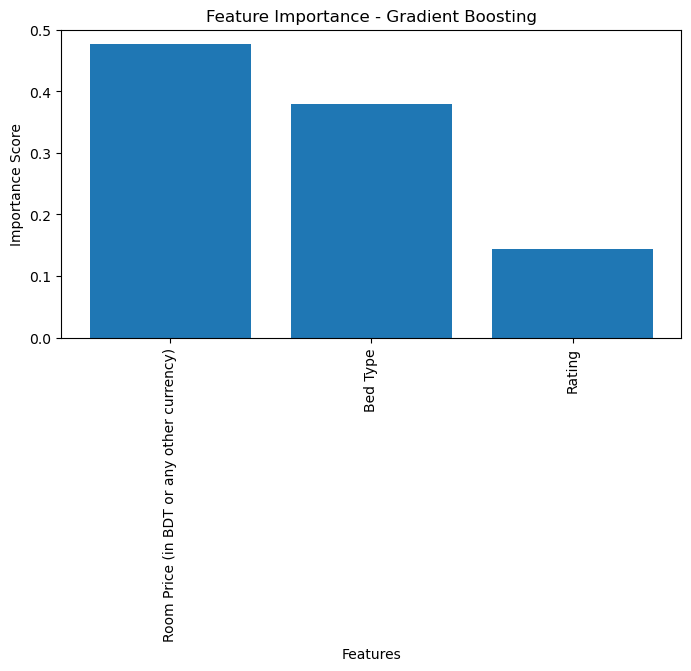

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy importance của các đặc trưng
feature_importance = model.feature_importances_
features = X.columns

# Sắp xếp theo thứ tự quan trọng giảm dần
indices = np.argsort(feature_importance)[::-1]

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.title("Feature Importance - Gradient Boosting")
plt.bar(range(X.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()